       Height
0  174.967142
1  168.617357
2  176.476885
3  185.230299
4  167.658466


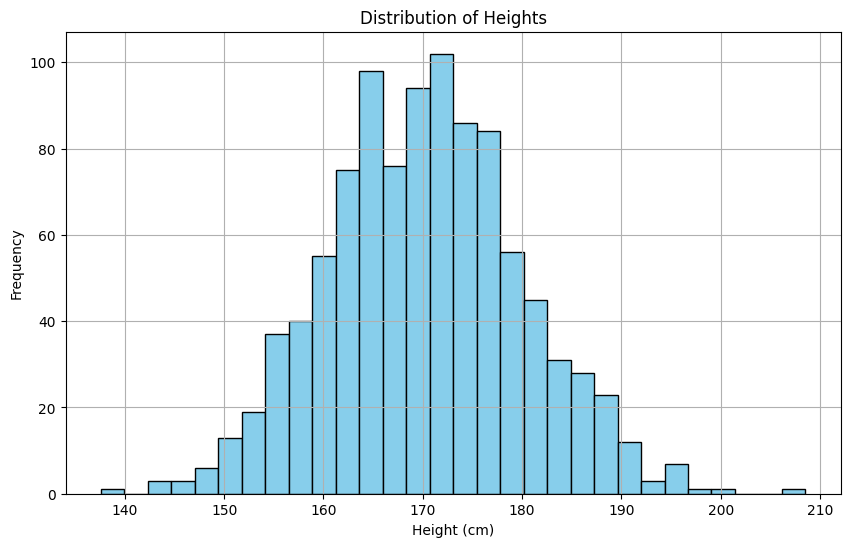

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic heights
# Assume a mean height of 170 cm and a standard deviation of 10 cm
mean_height = 170
std_dev = 10
num_samples = 1000

heights = np.random.normal(mean_height, std_dev, num_samples)

# Create a DataFrame to hold the heights
height_data = pd.DataFrame({'Height': heights})

# Display the first few rows of the dataset
print(height_data.head())

# Optionally, visualize the height distribution
plt.figure(figsize=(10, 6))
plt.hist(height_data['Height'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


       Height     Weight
0  174.967142  81.963919
1  168.617357  73.240525
2  176.476885  76.775037
3  185.230299  81.995615
4  167.658466  71.149583


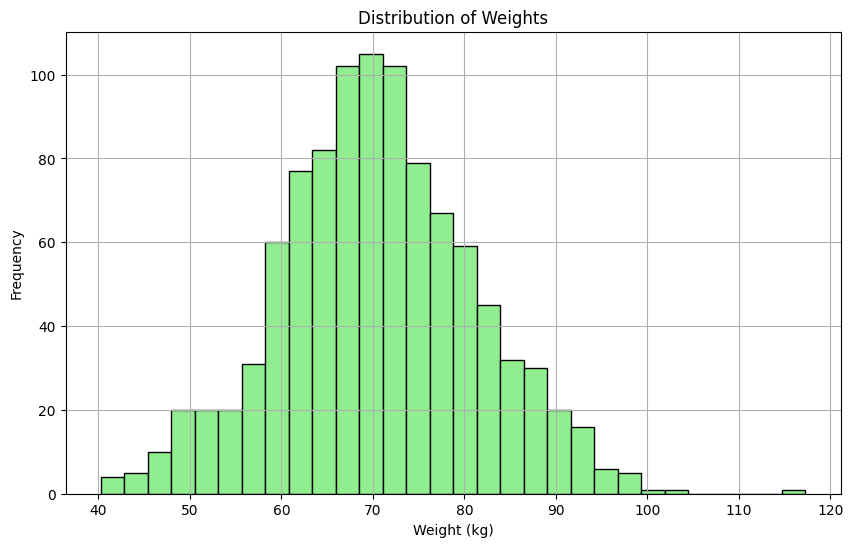

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic heights
mean_height = 170
std_dev_height = 10
num_samples = 1000
heights = np.random.normal(mean_height, std_dev_height, num_samples)

# Generate weights based on the formula
weights = heights - 100 + np.random.normal(0, 5, num_samples)

# Create a DataFrame to hold the heights and weights
data = pd.DataFrame({'Height': heights, 'Weight': weights})

# Display the first few rows of the dataset
print(data.head())

# Optionally, visualize the weight distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Weight'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


c:\Users\prakash.pawar\AppData\Local\anaconda3\envs\envML\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


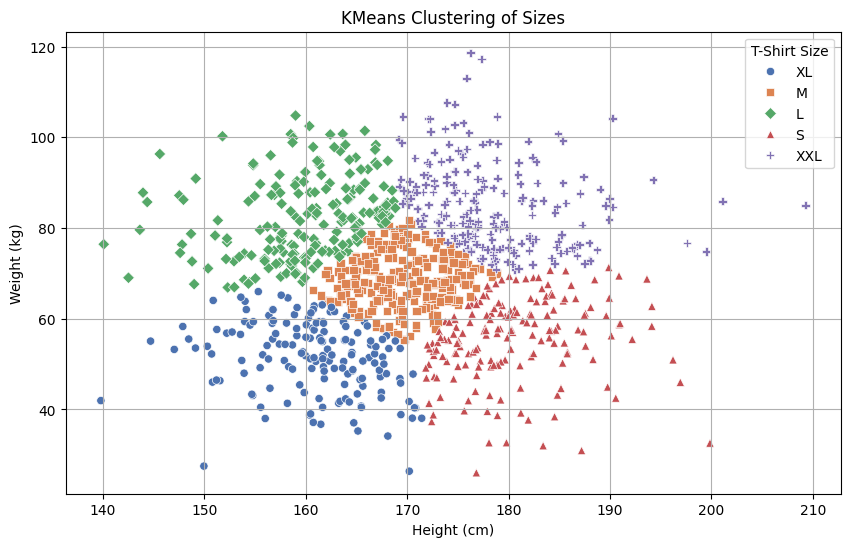

Size
M      259
XXL    215
L      188
S      174
XL     164
Name: count, dtype: int64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming `data` DataFrame already contains 'Height' and 'Weight'
# Create a DataFrame for the example
# Replace this with your existing data
data = pd.DataFrame({
    'Height': np.random.normal(170, 10, 1000),
    'Weight': np.random.normal(70, 15, 1000)
})

# Step 1: Define the size categories
size_labels = ['S', 'M', 'L', 'XL', 'XXL']
size_ranges = {
    'S': (150, 50),   # (height, weight)
    'M': (160, 65),
    'L': (170, 80),
    'XL': (180, 95),
    'XXL': (190, 110)
}

# Step 2: Prepare the data for clustering
X = data[['Height', 'Weight']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans with the number of clusters equal to the number of sizes
kmeans = KMeans(n_clusters=len(size_labels), random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Map the clusters to size labels
cluster_centers = kmeans.cluster_centers_
size_mapping = {i: size_labels[i] for i in range(len(size_labels))}
data['Size'] = data['Cluster'].map(size_mapping)

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Height', y='Weight', hue='Size', palette='deep', style='Size', markers=['o', 's', 'D', '^', 'P'])
plt.title('KMeans Clustering of Sizes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='T-Shirt Size')
plt.grid()
plt.show()

# Display a summary of sizes
size_distribution = data['Size'].value_counts()
print(size_distribution)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# Define size parameters (mean height and weight for S, M, L, XL)
sizes = {
    'S': (160, 50),
    'M': (170, 65),
    'L': (180, 80),
    'XL': (190, 95)
}

data = []
for size, (mean_height, mean_weight) in sizes.items():
    heights = np.random.normal(mean_height, 5, 250)  # Normal distribution around mean
    weights = np.random.normal(mean_weight, 5, 250)
    data.append(pd.DataFrame({'Height': heights, 'Weight': weights, 'Size': size}))

# Combine data into a single DataFrame
df = pd.concat(data, ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows
print(df.head())


       Height      Weight Size
0  172.220522   82.962635    L
1  192.910489  103.475255   XL
2  167.690183   52.975785    S
3  202.947818   93.522598   XL
4  162.524936   50.386842    S


c:\Users\prakash.pawar\AppData\Local\anaconda3\envs\envML\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\prakash.pawar\AppData\Local\anaconda3\envs\envML\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\prakash.pawar\AppData\Local\anaconda3\envs\envML\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\prakash.pawar\AppData\Local\

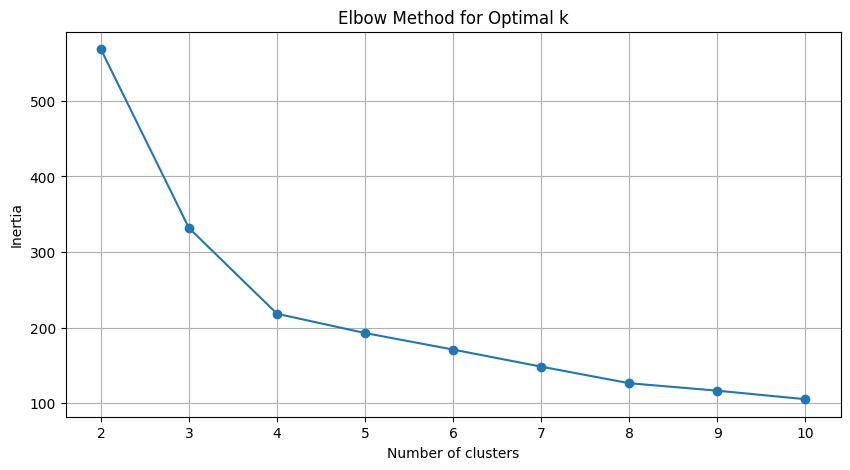

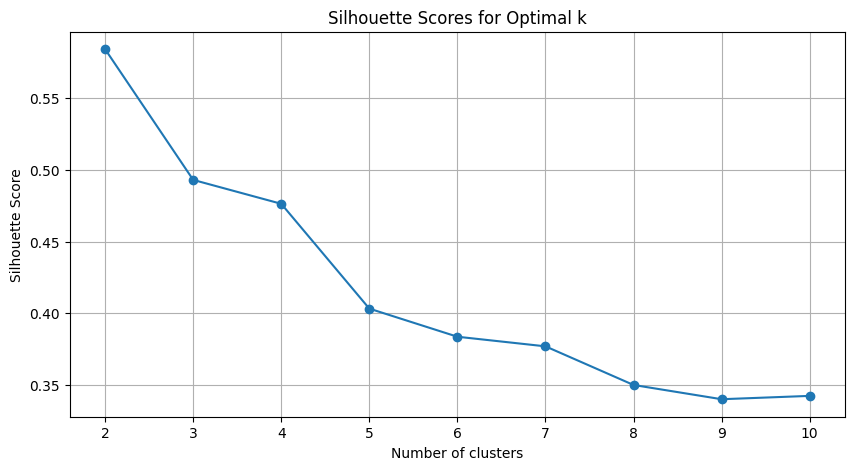

In [9]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df[['Height', 'Weight']])

# Calculate KMeans for a range of cluster numbers
inertia = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


A table from product,  how to find the most expensive product from each category 

  product_name      category  price
1    Product B   Electronics    300
3    Product D       Clothing     80
4    Product E     Furniture    150


SELECT category, product_name, price
FROM products
WHERE (category, price) IN (
    SELECT category, MAX(price)
    FROM products
    GROUP BY category
)


In [10]:
def simplify_directions(directions):
    # Define opposites of each direction
    opposites = {"North": "South", "South": "North", "East": "West", "West": "East"}
    
    # Initialize a stack to store the simplified path
    stack = []

    # Iterate over each direction
    for direction in directions:        
        # If the stack is not empty and the current direction cancels the last one, pop the stack
        if stack and stack[-1] == opposites.get(direction):
            stack.pop()  # Remove the opposite direction
        else:
            # Otherwise, add the current direction to the stack
            stack.append(direction)
    
    return stack

# Test input
#directions = ["North", "North", "East", "South", "West", "West"]
directions = ["North", "South", "East", "South", "West", "East"]
output = simplify_directions(directions)
print("Final Output:", output)


Final Output: ['East', 'South']
